In [7]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import tree
train_url = 'E:/Downloads/'
train = pd.read_csv(train_url + 'train.csv')
test =  pd.read_csv(train_url + 'test.csv')

In [8]:
train.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train['Age'].fillna(train['Age'].median(), inplace = True)

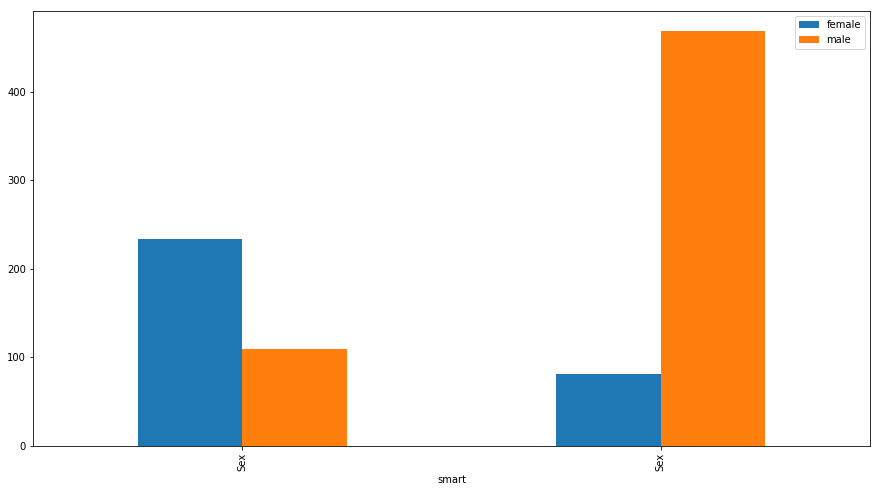

In [10]:
Survived_Sex = train['Sex'][train['Survived'] == 1].value_counts()
Dead_Sex = train['Sex'][train['Survived'] == 0].value_counts()
df = pd.DataFrame([Survived_Sex, Dead_Sex])

df.plot(kind= 'bar', figsize= (15,8))
plt.xlabel('smart')
plt.show()

In [11]:
d = { 'male': 0 , 'female': 1}
train['Sex'] = train['Sex'].map(d)

In [12]:
train.head(892)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = test['Survived']
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)

KeyError: 'Survived'

In [16]:
test.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


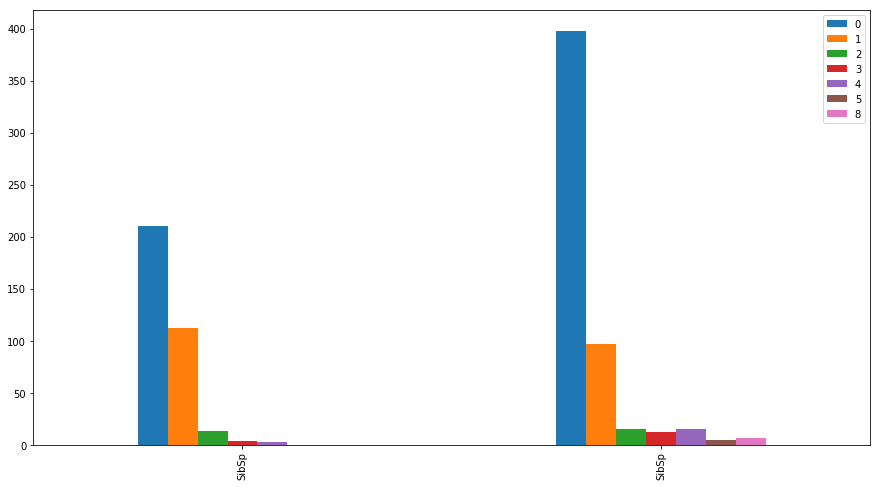

In [17]:
Survived = train['SibSp'][train['Survived'] == 1].value_counts()
Dead = train['SibSp'][train['Survived'] == 0].value_counts()
df = pd.DataFrame([Survived, Dead])

df.plot(kind= 'bar', figsize= (15,8))
plt.show()

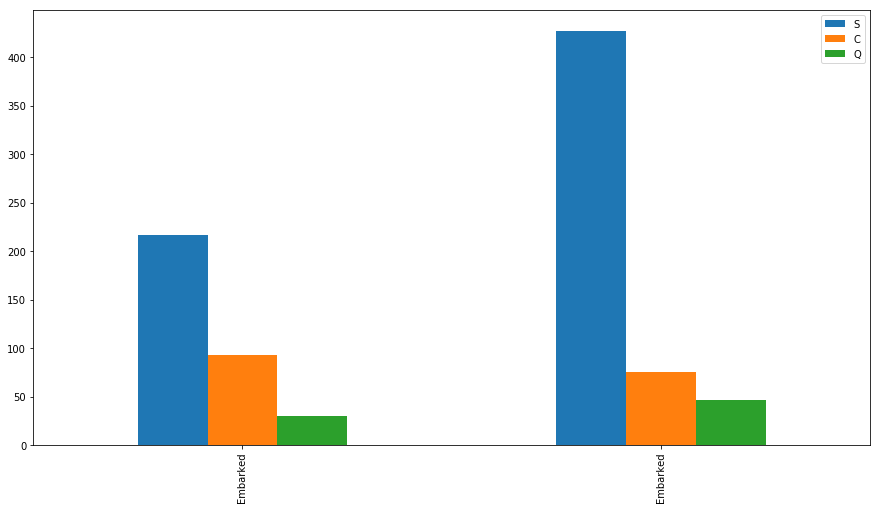

In [18]:
Survived_Sex = train['Embarked'][train['Survived'] == 1].value_counts()
Dead_Sex = train['Embarked'][train['Survived'] == 0].value_counts()
df = pd.DataFrame([Survived_Sex, Dead_Sex])

df.plot(kind= 'bar', figsize= (15,8))
plt.show()

In [19]:
Survived_Sex = train['Fare'][train['Survived'] == 1].value_counts()
Dead_Sex = train['Fare'][train['Survived'] == 0].value_counts()
df = pd.DataFrame([Survived_Sex, Dead_Sex])

df.plot(kind= 'bar', figsize= (15,8))
df.index('Survived', 'Dead')
plt.show()

TypeError: 'Index' object is not callable

In [ ]:
train['Fare'][train['Survived'] == 1].value_counts()

In [ ]:
train['Fare'][train['Survived'] == 0].value_counts()

In [ ]:
test['Survived'][train['Fare'] <= 15] = 0

In [20]:
df = pd.DataFrame([Survived_Sex, Dead_Sex])

In [21]:
df.plot(kind= 'bar', figsize= (15,8))

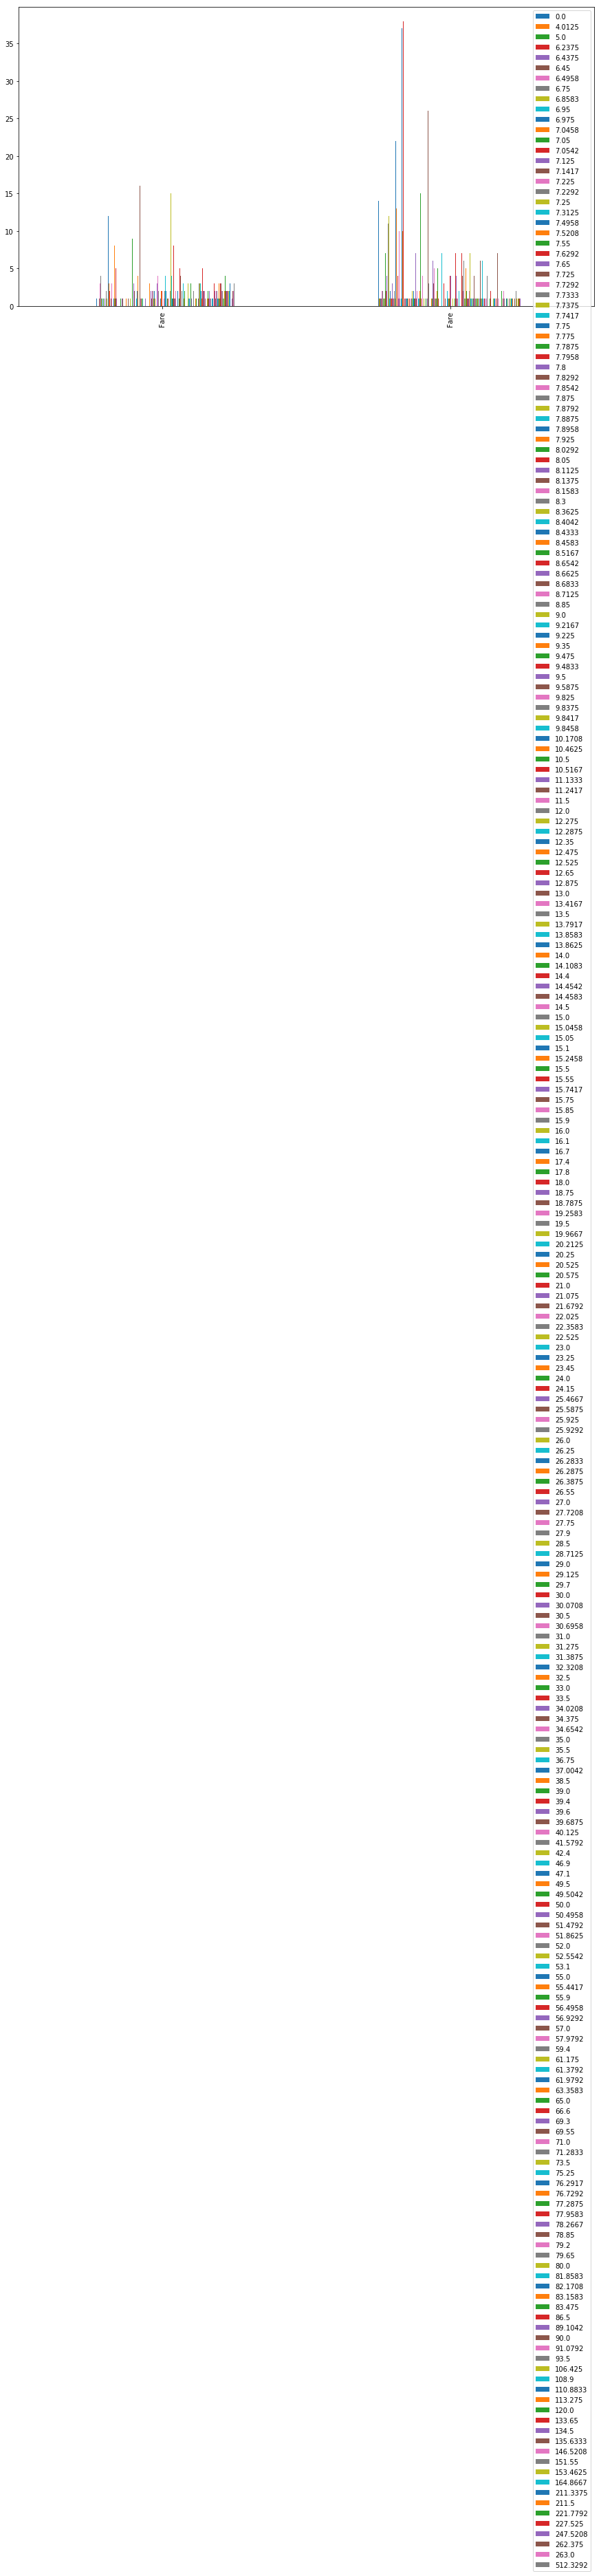

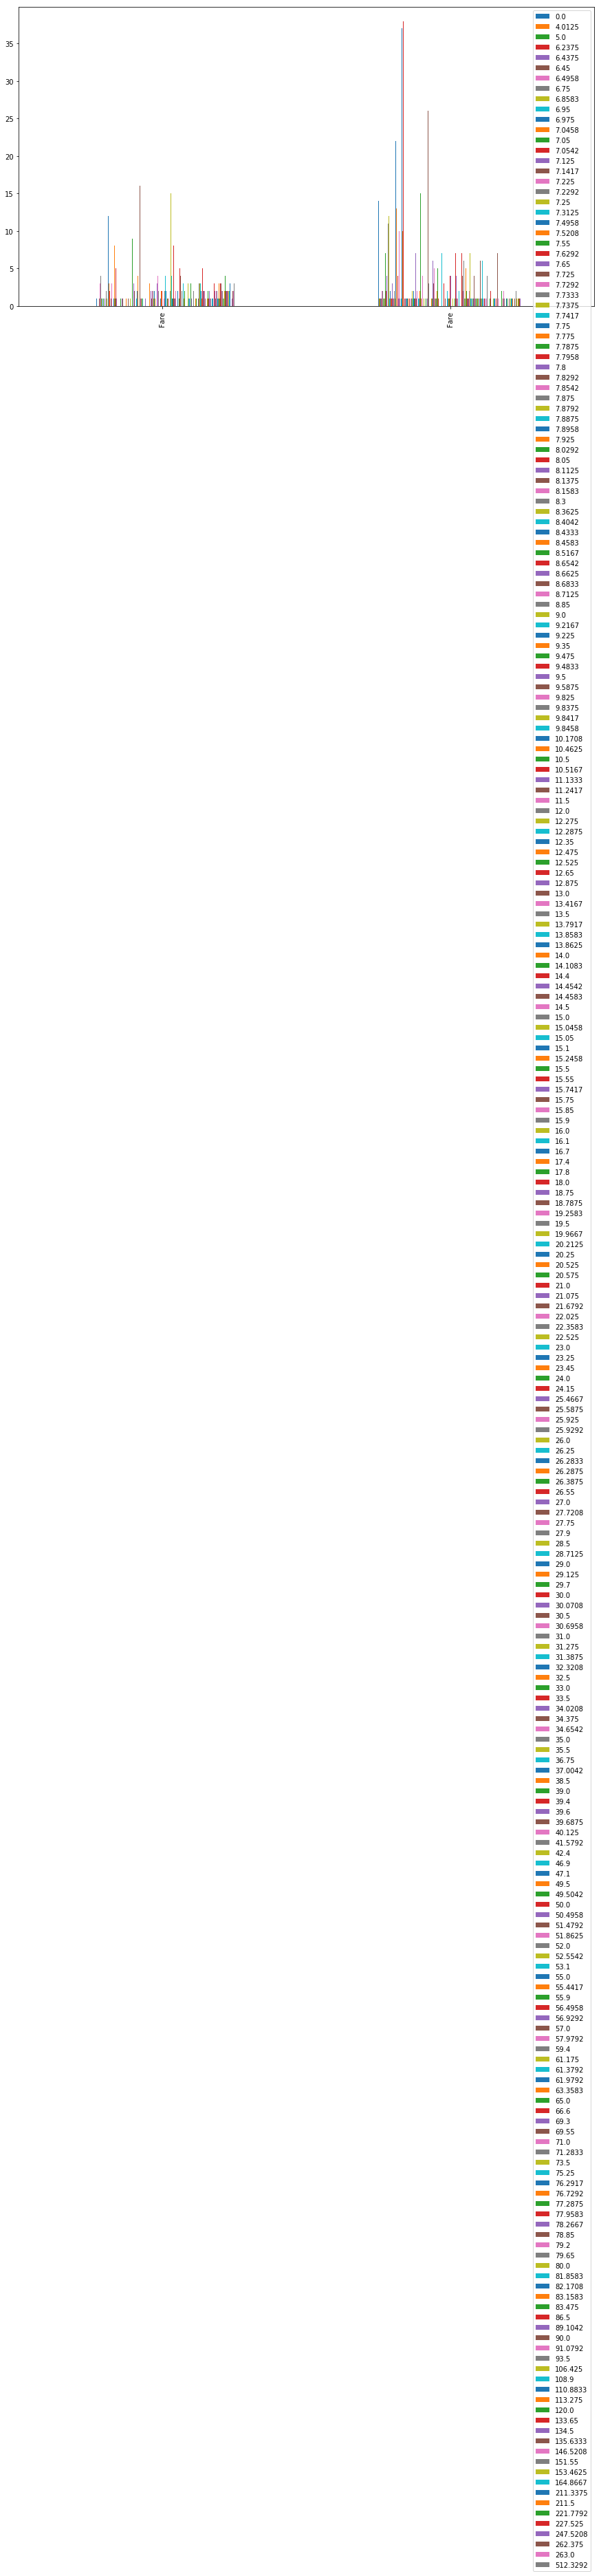

In [22]:
plt.show()

In [23]:
test['Survived'][test['SibSp'] == 0] = 0

KeyError: 'Survived'

In [ ]:
test.head(30)

In [ ]:
test['Survived'][test['Sex'] == 'female'] = 1

In [ ]:
test.head(30)

In [ ]:
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = test['Survived']
df_output[['PassengerId','Survived']].to_csv('outputbhai.csv',index=False)

In [ ]:
test['Survived'][test['Embarked'] == 'S'] = 0

In [ ]:
test['Survived'][test['Sex'] == 'female'] = 1

In [ ]:
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = test['Survived']
df_output[['PassengerId','Survived']].to_csv('outputbhai1.csv',index=False)